In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [3]:
bb100.apply(pd.Series.nunique)

url                        3279
WeekID                     3279
Week Position               100
Song                      24360
Performer                 10061
SongID                    29389
Instance                     10
Previous Week Position      100
Peak Position               100
Weeks on Chart               87
dtype: int64

In [4]:
#Number of Weeks in the Billboard Top 100 Dataset from 1958 to 2021
bb100.apply(pd.Series.nunique)[0]

3279

In [5]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [6]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.to_datetime(bb100['WeekID'])

In [7]:
#Billboard Top #1 By Week from 1958 to 2021
bb1 = bb100[bb100['Week Position']==1].copy()
bb1.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
944,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
22342,http://www.billboard.com/charts/hot-100/1958-08-09,1958-08-09,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,1.0,1,2
232960,https://www.billboard.com/charts/hot-100/2021-05-22,2021-05-22,1,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),Leave The Door OpenSilk Sonic (Bruno Mars & Anderson .Paak),1,2.0,1,10
3522,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,1,Good 4 U,Olivia Rodrigo,Good 4 UOlivia Rodrigo,1,NaN,1,1


In [23]:
bb1['Song'].replace({'Candle In The Wind 1997/Something About The Way You Look Tonight':'Candle In The Wind'}, inplace=True)
bb1['Song'].replace({'Macarena (Bayside Boys Mix)':'Macarena'}, inplace=True)
bb1['Song'].replace({'End Of The Road (From "Boomerang")':'End Of The Road'}, inplace=True)

In [24]:
bb1_counter = bb1['SongID'].value_counts().rename('Count').to_frame().reset_index()
bb1_counter = bb1_counter.rename(columns = {'index':'SongID'})
bb1_counter = bb1_counter.iloc[0:15]
bb1_counter.iloc[10]

SongID    End Of The Road (From "Boomerang")Boyz II Men
Count                                                13
Name: 10, dtype: object

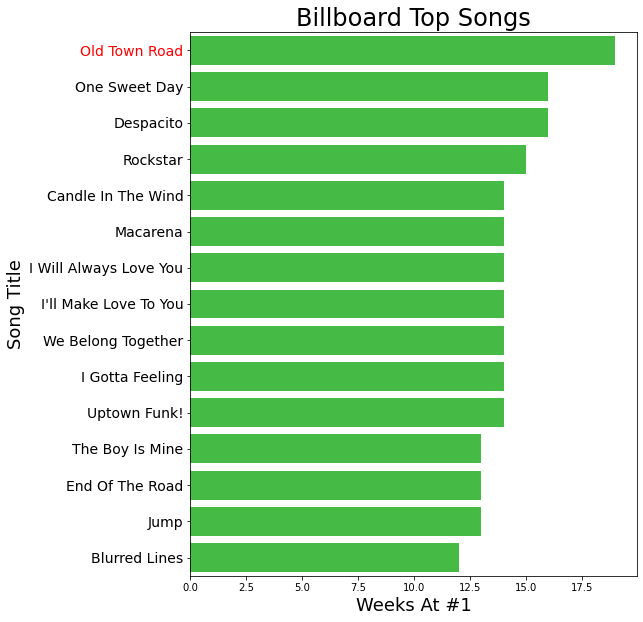

In [31]:
#sns.countplot(y='SongID', data=bb1)
plt.figure(figsize=(8,10))
plt.title('Billboard Top Songs', fontsize=24)
sns.countplot(y='Song', data=bb1, order=pd.value_counts(bb1['Song']).iloc[:15].index, color='limegreen')
plt.xlabel('Weeks At #1', fontsize=18)
plt.ylabel('Song Title', fontsize=18)
plt.yticks(fontsize=14)
plt.gca().get_yticklabels()[0].set_color("red")
plt.savefig('Top1s.png', bbox_inches='tight', pad_inches=2);

In [66]:
bb1_counters = bb1['SongID'].value_counts().rename('Count').to_frame().reset_index()
bb1_counters = bb1_counters.rename(columns = {'index':'SongID'})
bb1_counters

,SongID,Count
0,Old Town RoadLil Nas X Featuring Billy Ray Cyrus,19
1,One Sweet DayMariah Carey & Boyz II Men,16
2,DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber,16
3,I Gotta FeelingThe Black Eyed Peas,14
4,We Belong TogetherMariah Carey,14
...,...,...
1119,StayMaurice Williams & The Zodiacs,1
1120,"Can't Get Enough Of Your Love, BabeBarry White",1
1121,Papa Was A Rollin' StoneThe Temptations,1
1122,Suspicious MindsElvis Presley,1


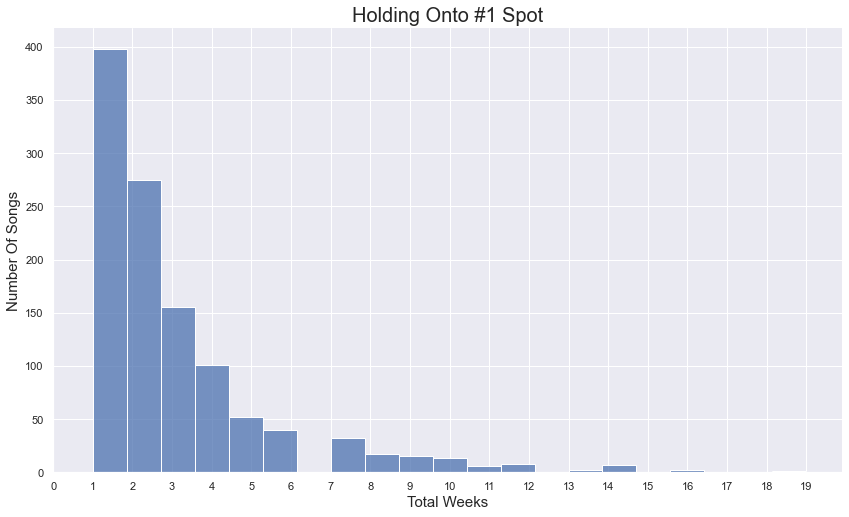

In [74]:
sns.displot(x=bb1_counters['Count'], bins=21, height=7, aspect=1.7)
plt.xlabel('Total Weeks', fontsize=15)
plt.ylabel('Number Of Songs', fontsize=15)
plt.title('Holding Onto #1 Spot', fontsize=20)
plt.xticks(np.arange(0,20,1))
plt.savefig('SongsOne.png', bbox_inches='tight', pad_inches=2);

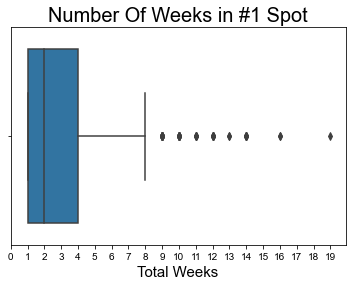

In [10]:
sns.boxplot(x=bb1_counter['Count'], width=0.8)
plt.xlabel('Total Weeks', fontsize=15)
plt.title('Number Of Weeks in #1 Spot', fontsize=20)
plt.xticks(np.arange(0,20,1))
sns.set(rc={'figure.figsize':(14,6)});

In [11]:
#Cross check values of boxplot via describe()
bb1_counter.describe()

,Count
count,1124.000000
mean,2.917260
std,2.552268
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,19.000000


In [12]:
#Cross check shape of dataframe vs 'count', total count vs url weeks
print(bb1_counter.shape)
print(bb1_counter.Count.sum())

(1124, 2)
3279


In [13]:
#Any song which has been ranked #1 for more than 8 weeks is an OUTLIER
#Which ones are they? 

Outliers = bb1_counter[bb1_counter['Count']>8].copy()
Outliers.describe()

,Count
count,54.000000
mean,11.148148
std,2.235287
min,9.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,19.000000


In [14]:
Outliers

,SongID,Count
0,Old Town RoadLil Nas X Featuring Billy Ray Cyrus,19
1,One Sweet DayMariah Carey & Boyz II Men,16
2,DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber,16
3,I Gotta FeelingThe Black Eyed Peas,14
4,We Belong TogetherMariah Carey,14
5,Candle In The Wind 1997/Something About The Way You Look TonightElton John,14
6,Macarena (Bayside Boys Mix)Los Del Rio,14
7,I'll Make Love To YouBoyz II Men,14
8,I Will Always Love YouWhitney Houston,14
9,Uptown Funk!Mark Ronson Featuring Bruno Mars,14


In [15]:
outlier_features = pd.merge(Outliers, features, on='SongID', how='left')
outlier_features

,SongID,Count,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,Old Town RoadLil Nas X Featuring Billy Ray Cyrus,19,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,"['country rap', 'lgbtq+ hip hop', 'pop rap']",2YpeDb67231RjR0MgVLzsG,https://p.scdn.co/mp3-preview/d94ec2ebe62fd52cf038760f57c251c145346bb2?cid=b8d3901151d34489a160e3cf0ab1fa94,157066.0,0.0,7 EP,0.878,0.619,6.0,-5.560,1.0,0.1020,0.053300,0.000000,0.1130,0.6390,136.041,4.0,91.0
1,Old Town RoadLil Nas X Featuring Billy Ray Cyrus,19,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,"['country rap', 'lgbtq+ hip hop', 'pop rap']",2YpeDb67231RjR0MgVLzsG,https://p.scdn.co/mp3-preview/d94ec2ebe62fd52cf038760f57c251c145346bb2?cid=b8d3901151d34489a160e3cf0ab1fa94,157066.0,0.0,7 EP,0.878,0.619,6.0,-5.560,1.0,0.1020,0.053300,0.000000,0.1130,0.6390,136.041,4.0,91.0
2,One Sweet DayMariah Carey & Boyz II Men,16,Mariah Carey & Boyz II Men,One Sweet Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber,16,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,Despacito,"['latin', 'latin pop', 'puerto rican pop', 'tropical']",6rPO02ozF3bM7NnOV4h6s2,NaN,228826.0,0.0,Despacito Feat. Justin Bieber (Remix),0.653,0.816,2.0,-4.353,1.0,0.1670,0.228000,0.000000,0.0967,0.8160,178.086,4.0,76.0
4,I Gotta FeelingThe Black Eyed Peas,14,The Black Eyed Peas,I Gotta Feeling,"['dance pop', 'pop', 'pop rap']",4vp2J1l5RD4gMZwGFLfRAu,NaN,289133.0,0.0,THE E.N.D. (THE ENERGY NEVER DIES),0.741,0.748,0.0,-6.299,1.0,0.0264,0.082300,0.000000,0.3400,0.6000,127.965,4.0,70.0
5,We Belong TogetherMariah Carey,14,Mariah Carey,We Belong Together,"['dance pop', 'pop', 'r&b', 'urban contemporary']",3LmvfNUQtglbTrydsdIqFU,NaN,201400.0,0.0,The Emancipation of Mimi,0.838,0.469,0.0,-7.992,1.0,0.0835,0.035800,0.000000,0.0928,0.7780,139.975,4.0,72.0
6,Candle In The Wind 1997/Something About The Way You Look TonightElton John,14,Elton John,Candle In The Wind 1997/Something About The Way You Look Tonight,"['glam rock', 'mellow gold', 'piano rock', 'soft rock']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Macarena (Bayside Boys Mix)Los Del Rio,14,Los Del Rio,Macarena (Bayside Boys Mix),"['deep norteno', 'duranguense', 'norteno', 'norteno-sax']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,I'll Make Love To YouBoyz II Men,14,Boyz II Men,I'll Make Love To You,"['boy band', 'new jack swing', 'pop', 'quiet storm', 'r&b', 'urban contemporary']",61sQYdFNS6sEBYCyr1q5gn,NaN,236773.0,0.0,II,0.557,0.509,2.0,-7.928,1.0,0.0243,0.119000,0.000000,0.0794,0.2440,142.408,3.0,65.0
9,I Will Always Love YouWhitney Houston,14,Whitney Houston,I Will Always Love You,"['dance pop', 'pop', 'r&b']",4eHbdreAnSOrDDsFfc4Fpm,https://p.scdn.co/mp3-preview/91e6d3e0b48cda2f3a1b2391a1c1384fbf73b8a8?cid=b8d3901151d34489a160e3cf0ab1fa94,271093.0,0.0,The Bodyguard - Original Soundtrack Album,0.306,0.214,4.0,-12.518,1.0,0.0356,0.844000,0.000005,0.0839,0.1080,66.980,4.0,78.0


In [16]:
#Sum the Null Values by Column: 
outlier_features.isnull().sum()

SongID                        0
Count                         0
Performer                     0
Song                          0
spotify_genre                 1
spotify_track_id              6
spotify_track_preview_url    29
spotify_track_duration_ms     6
spotify_track_explicit        6
spotify_track_album           6
danceability                  6
energy                        6
key                           6
loudness                      6
mode                          6
speechiness                   6
acousticness                  6
instrumentalness              6
liveness                      6
valence                       6
tempo                         6
time_signature                6
spotify_track_popularity      6
dtype: int64

In [17]:
#Get 'Old Town Road' preview URL:
OTR = outlier_features['spotify_track_preview_url'].iloc[0]
OTR

'https://p.scdn.co/mp3-preview/d94ec2ebe62fd52cf038760f57c251c145346bb2?cid=b8d3901151d34489a160e3cf0ab1fa94'

In [18]:
#Download URL and save as MP3 file: 
import urllib.request
url = OTR
filename = 'Old_Town_Road.mp3'
urllib.request.urlretrieve(url, filename)

('Old_Town_Road.mp3', <http.client.HTTPMessage at 0x7f89370bcc10>)

In [19]:
#Play MP3 file: 
from IPython.display import Audio
Audio('Old_Town_Road.mp3')

In [ ]:
outlier_comp_features = outlier_features[['SongID','danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
outlier_comp_features = outlier_comp_features.iloc[1: , :]
outlier_comp_features

In [ ]:
outlier_comp_features[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].mean()

In [ ]:
#Billboard Bottom '99' By Week from 1958 to 2021

bb99 = bb100[bb100['Week Position']!=1].copy()
bb99.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

In [ ]:
bb99 = bb99[bb99['Peak Position']!=1].copy()
print(bb99['Peak Position'].min())
bb99.sort_values(by='Peak Position')

In [ ]:
bb99 = bb99['SongID'].value_counts().to_frame().reset_index()
bb99 = bb99.rename(columns = {'index':'SongID', 'SongID':'Frequency'})
bb99

In [ ]:
features_99 = pd.merge(bb99, features, on='SongID', how='left')
features_99

In [ ]:
features_99[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].mean()

In [ ]:
outlier_comp_features[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].mean()

In [ ]:
#One option is to do Radar Plot between outliers vs rest. Is there a significant difference??
#Is this worth it? Is there much difference? Can it tell a story? Unclear. 

In [ ]:
#extract the upper and lower quantiles
lq = bb1_counter['Count'].quantile(0.25)
uq = bb1_counter['Count'].quantile(0.75)
iqr = uq - lq
upper_bound = uq + 1.5*iqr

print(bb1_counter_lq)
print(bb1_counter_uq)
print(iqr)
print(upper_bound)

#extract values outside these bounds 
#Pokemon_IQR_outliers = pokemon[(pokemon.HP <= lower_bound) | (pokemon.HP >= upper_bound)]
#Pokemon_IQR_outliers

In [ ]:
#ECDF to keep in mind for future use:
sns.displot(bb1_counter, x='Count', kind='ecdf');